## Data Import
The dataset used for this project is the Employee Turnover Analytics Dataset. It is sourced from [Kaggle](https://www.kaggle.com/datasets/akshayhedau/employee-turnover-analytics-dataset) and is stored in CSV format.

In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv('employee_turnover_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Organization
The dataset was cleaned by removing missing values to ensure the integrity of the analysis. The following columns are used for modeling:
- `salary`
- `job_satisfaction`
- `years_at_company`
- `left` (target variable)

In [17]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the missing values
print("\nMissing Values:")
missing_values


Missing Values:


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

## Data Analysis

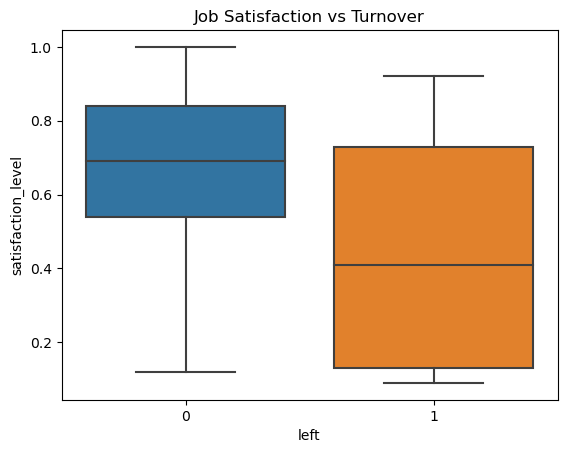

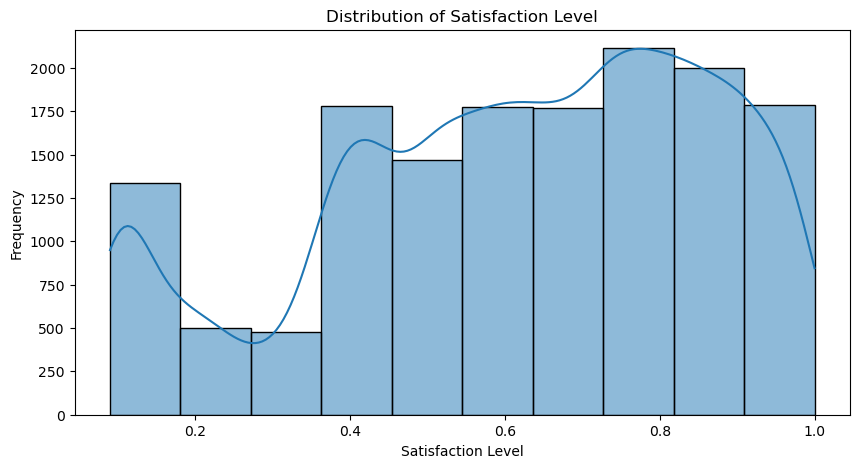


Summary Statistics:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the relationship between job satisfaction and turnover
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Job Satisfaction vs Turnover')
plt.show()

# Visualizing the distribution of satisfaction level
plt.figure(figsize=(10, 5))
sns.histplot(df['satisfaction_level'], bins=10, kde=True)
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

# Statistical summary
summary_statistics = df.describe()
print("\nSummary Statistics:")
print(summary_statistics)


## Model
The logistic regression model was trained using the training dataset, allowing us to classify employees based on their likelihood to stay or leave.

In [23]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['left'])
y = df['left']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and Testing Sets Created:")
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")

Training and Testing Sets Created:
Training Set Size: 11999
Testing Set Size: 3000


In [24]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()


# One-Hot Encoding for categorical variables
X_encoded = pd.get_dummies(X_train, columns=['sales', 'salary'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['sales', 'salary'], drop_first=True)

# Ensure the training and testing sets have the same columns
X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Initialize the model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_encoded, y_train)

print("Model Training Completed.")

Model Training Completed.


/Users/joannajohn/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
